<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Energy_based_Generative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy-based Generative Adversarial Network**

논문 링크: https://arxiv.org/abs/1609.03126

해당 논문은 Yann LeCun 교수님이 저자로 있기 때문에 유명한 논문이다. EBGAN은 이름에서 볼 수 있듯이 Energy-based라는 거창한 이름을 가지고 있다. EBGAN은 당시 대다수의 GAN 모델에서 Discriminator가 0 ~ 1를 내뱉도록 디자인된 기존의 probabilistic GAN에서 벗어나지 못하고 있을때, **energy**라는 개념을 도입했다.

본 논문에서는 discriminator가 단순 0과 1사이의 값이 아닌 좀더 다양한 값을 내뱉을수 있게 된다면, **더욱 폭이 넓은 기울기를 가질 수 있게 되며 maniford를 보다 실제에 가깝게 학습**을 할 수 있다고 주장했다.

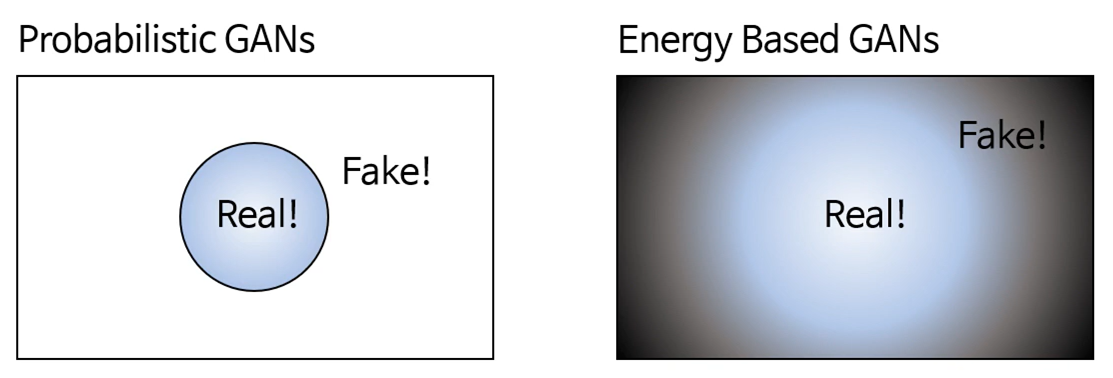

즉, 위의 그림에서 왼쪽 부분과 같이 real과 fake로 마치 벽을 쳐놓은것과 같이 학습을 하는 것이 아닌 오른쪽 부분과 같이 real에 가까운 정도, fake에 가까운 정도(데이터의 밀도)로 학습을 진행하게 된다.

## **EBGAN 구조**

위에서 설명했던 개념을 다시 보면 supervised learning에서 사용되는 학습을 unsupervised learning에 도입했다라고 생각할 수 있다. supervised learningㅇ서 예를 들면 학습을 시키려는 CNN의 경우는 cross-entropy가 작아지는 방향으로 즉, 에너지가 작아지는 방향으로 학습이 진행된다. 이처럼 unsupervised learning에서도 **input space의 각 포인트를 single scalar로 mapping 시키는 것을 energy라고 정의하고, 학습이 제대로 될시 low-energy를 생성하며 제대로 되지 않은 경우는 high-energy를 생성**한다.

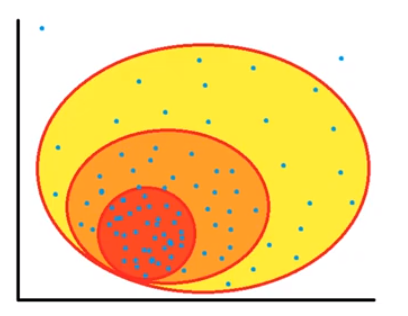

위의 그림을 보면 쉽게 이해할 수 있다. 위의 그림에서 파란색 점들이 data라고 생각하면 되고. 원들을 scalar box라고 생각하면 된다. 학습을 하게 되면 당연히 일부 data들이 유사성을 띄게 되며 빨간색 원처럼 한 군데에 모이게 된다. 이렇게 **데이터의 밀도가 높은 곳을 low-energy를 할당**하게 된다. 반면 **데이터의 밀도가 낮은 곳일수록 high-energy를 할당**하게 된다. 즉, 우리의 GAN 모델이 **좋은 성능을 내기 위해서는 Energy function에 넣었을 경우 low-energy를 생성**할 수 있어야 한다.

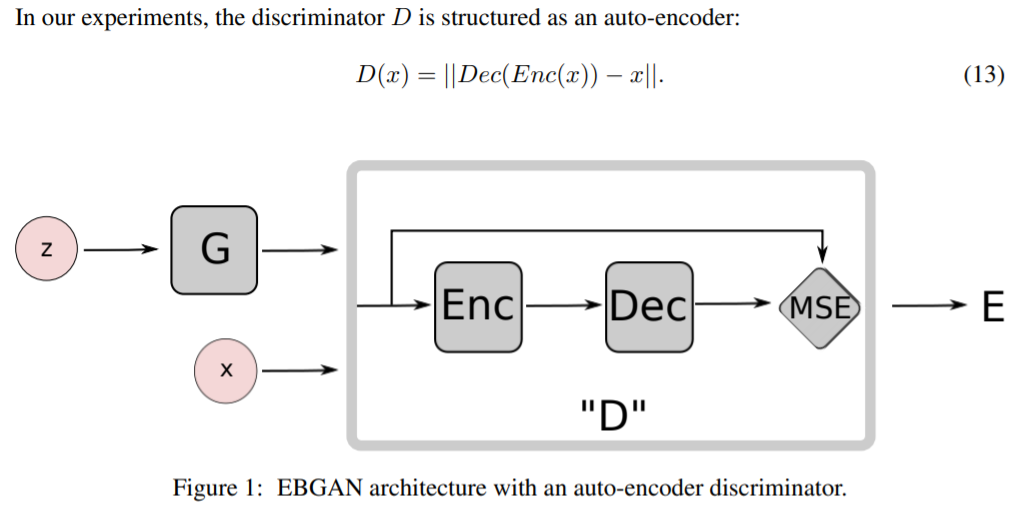

EBGAN에서 중요한 점은 Discriminator를 energy function으로 보는 것이다. Generator의 경우는 구조에 큰 차이가 없다. 그러면 과연 어떻게 discriminator를 energy function 볼 수 있을까? 바로 **Auto-Encoder**를 이용한다.

본 논문에서는 auto-encdoer가 원래 대표적인 energy based model이라고 주장한다. auto-encoder에서 input을 압축했다가 다시 원래 input으로 복원하게끔 하는데, 이 부분에서 압축을 하는 과정이 scalar에 mapping을 하는 것이다.

Generator가 z로 생성한 이미지를 encoder과 decoder에 각각 넣었을때 원본 이미지 x와 얼마나 차이가 나는지를 계산하게 된다. MSE가 작게 나오는 경우 즉, low-energy의 경우 원본 이미지와 차이가 적게 났다는 것이므로 잘 생성한 경우이다.

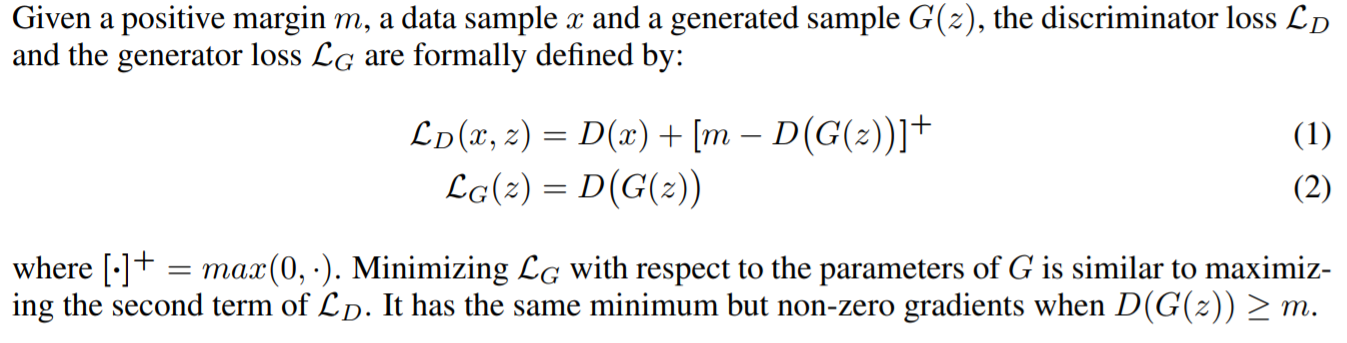

결과적으로 최종 loss function은 위와 같이 된다. Generator의 경우 기존 GAN과 차이점이 없지만, discriminator의 경우 실제 이미지는 낮은 값을 할당해야하고 가짜 이미지는 높은 값을 할당해야하기 때문에 D(x)에서는 낮은 값을 가져야하고, 뒤의 식에서는 margin에 generator의 loss 값을 뺀 것과 0의 maximum값을 더하게 된다. **즉, max[0, m - D(G(z))]의 의미를 생각해보면 generator가 학습이 덜 된 경우는 D(G(z))가 높은 값을 가지므로 m - D(G(z))가 0보다 낮은 값을 가지므로 max에 넣으면 0이 나오게 되고 학습이 될 수록 D(G(z))가 낮아지므로 m - D(G(z))가 0보다 높은 값을 가지므로 max에 넣으면 m - D(G(z))가 나오게 된다.**

### **Repelling Regularizer**

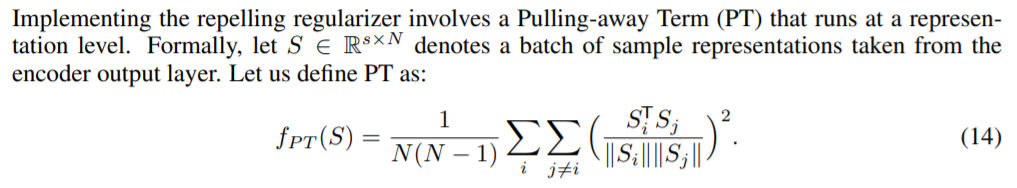

여기서 문제점이 몇가지 발생하였는데, Discriminator가 모두 energy를 0으로 할당하는 경우가 있다. 그래서 이를 해결하기 위해 data maniford 바깥에 보다 높은 high-energy를 강제로 할당할 필요가 있어서 논문에서는 **Repelling Regularizer**라는 것을 활용한다. 이를 활요한 모델은 EBGAN-PT라고 정의한다.

## **Experiments**

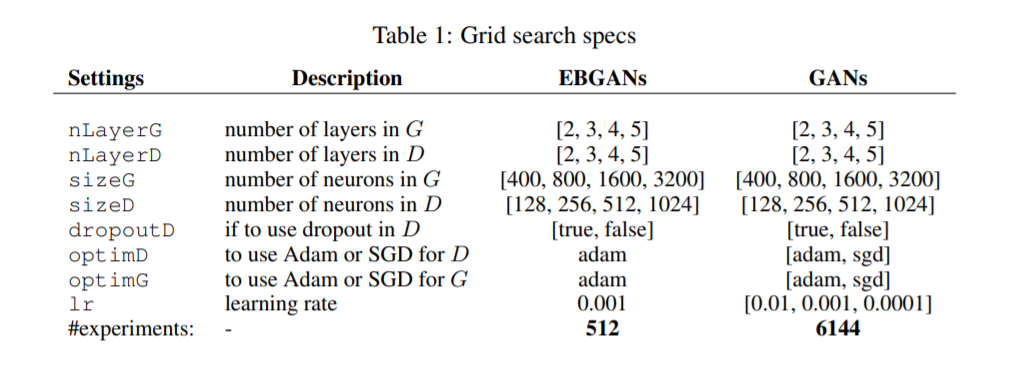

위의 표 Table 1에서 논문에서 사용한 grid search(= 모델에 가장 적합한 파라미터를 찾기 위한 순차적 탐색)를 보여준다.

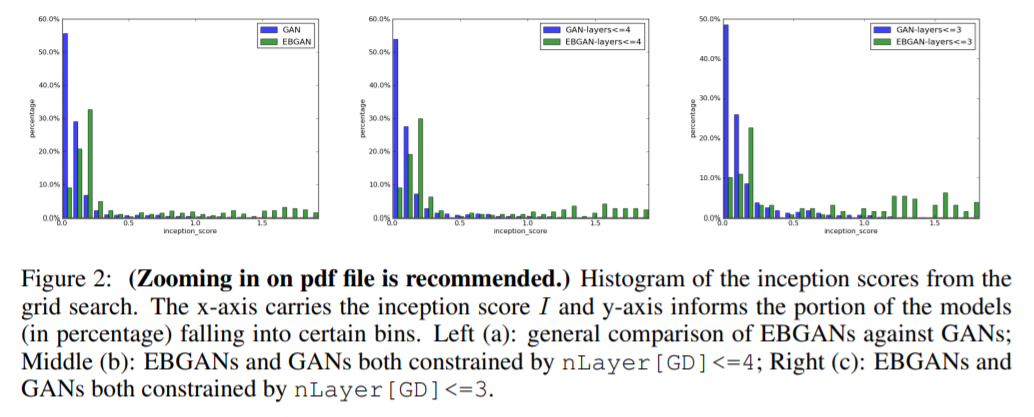

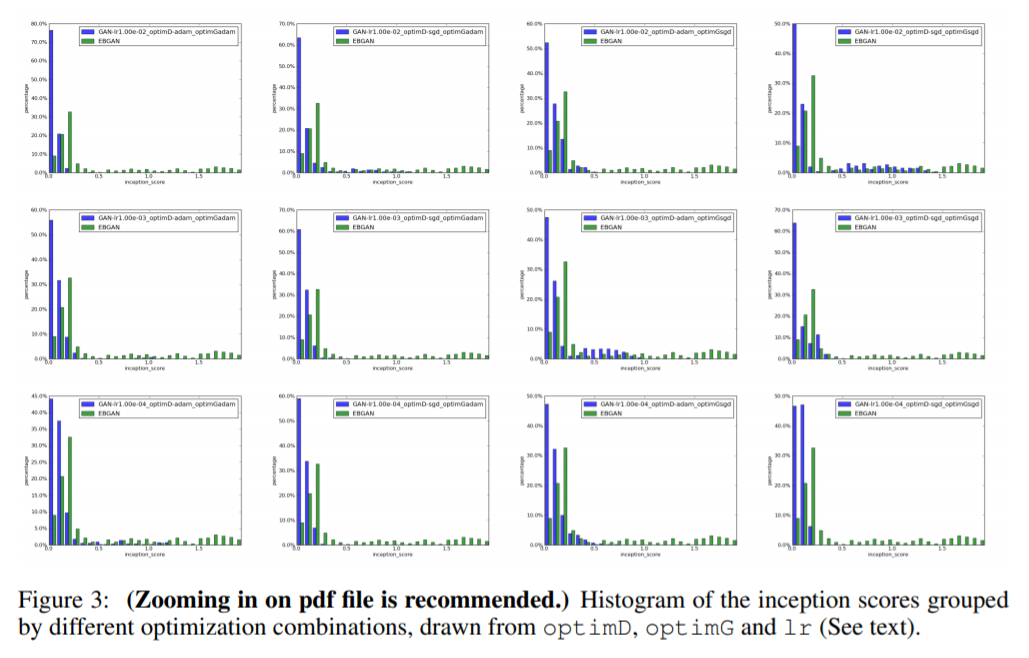

위의 그림 Figure 3은 hyper-parameter를 수정하여 inceptuon socre를 plot으로 시각화한 것이다.

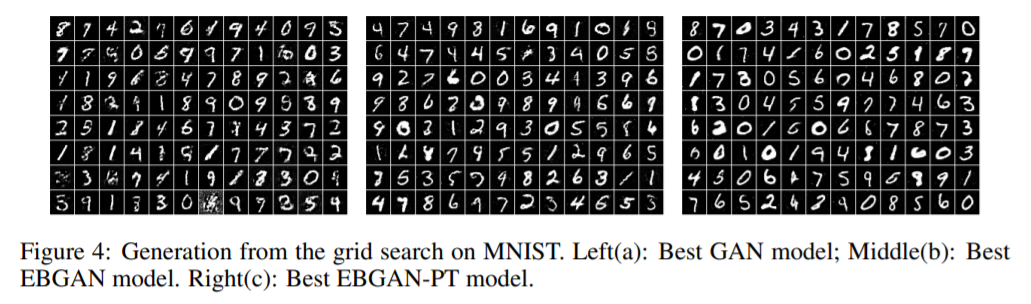

위의 그림 Figure 4는 가장 좋은 inception score가 나온 GAN, EBGAN, EBGAN-PT의 MNIST 값을 각각 시각화한 것이다.

GAN의 경우는
- nLayerG=5, nLayerD=2, sizeG=1600, sizeD=1024, dropoutD=0,
optimD=SGD, optimG=SGD, lr=0.01.

EBGAN의 경우는
- nLayerG=5, nLayerD=2, sizeG=800, sizeD=1024, dropoutD=0,
optimD=ADAM, optimG=ADAM, lr=0.001, margin=10.

EBGAN-PT의 경우는
- same as (b), with λP T = 0.1

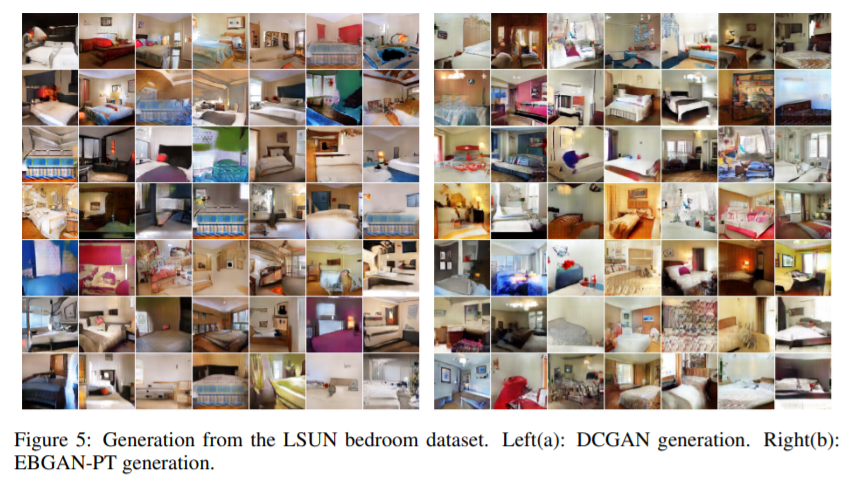

위의 그림 Figure 5는 LSUN bedroom dataset으로 학습시킨 DCGAN과 EBGAN-PT의 결과를 비교한 것이다.

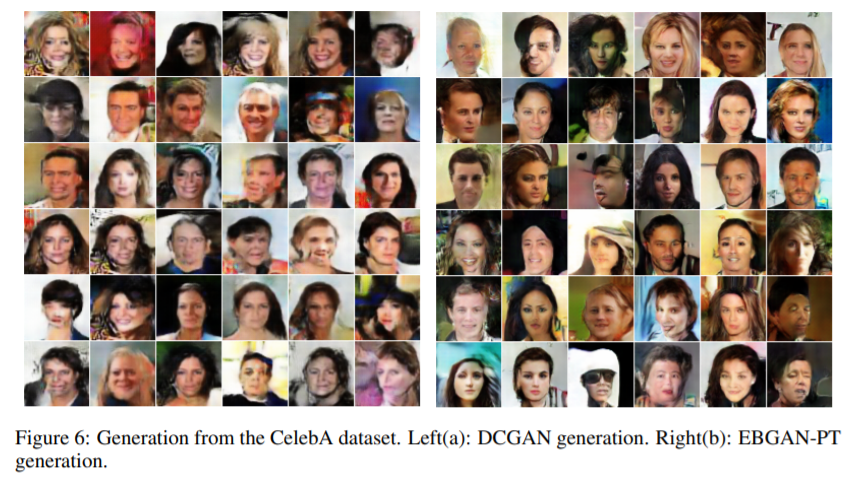

위의 그림 Figure 6은 CelebA dataset으로 학습시킨 DCGAN과 EBGAN-PT의 결과를 비교한 것이다.

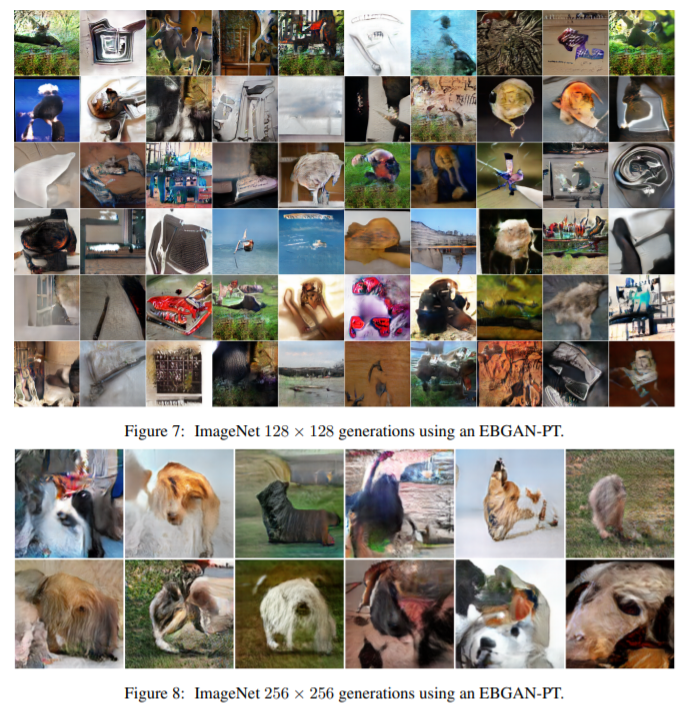

위의 그림 Figure 7과 8은 각각 ImageNet으로 학습시킨 EBGAN-PT로 각각 128 x 128 그리고 256 x 256 이미지를 생성한 것이다.

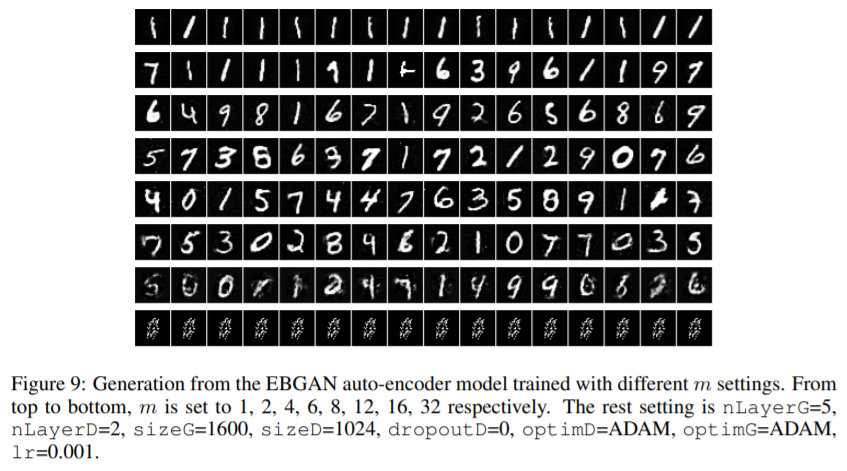

위의 그림 Figure 9는 discriminator loss function의 m 값을 수정한 값이다. m의 값이 너무 크면 불안정하며 너무 작은 경우도 mode-dropping 문제가 발생한다.

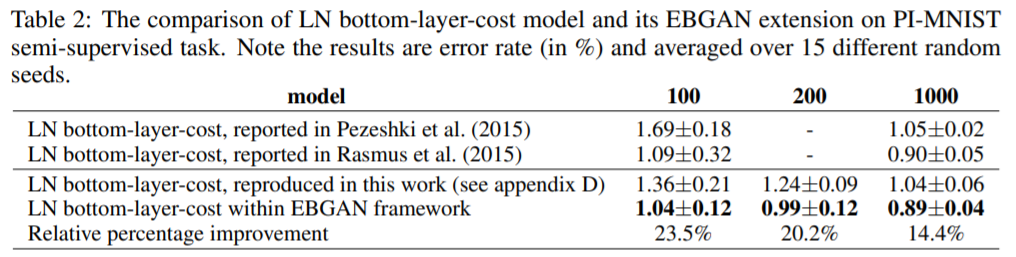

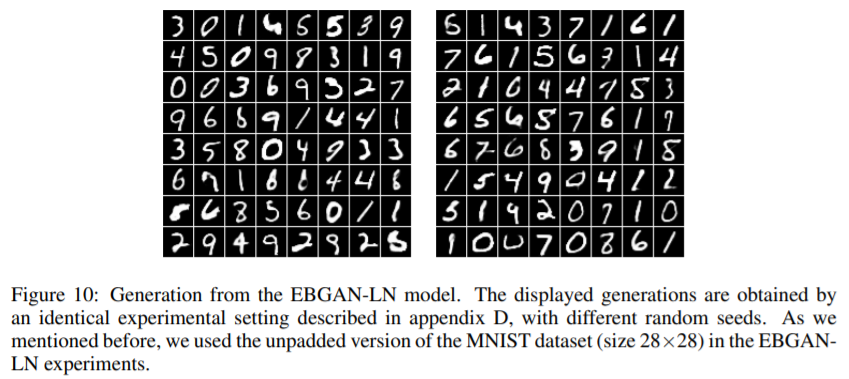

마지막으로 위의 표 Table 2와 그림 Figure 10은 **layer-cost Ladder Network**를 사용한 EBGAN-LN의 결과를 보여준다.